# GRUANpy Proof of Concept

GRUANpy is a python toolkit to facilitate the analysis of GRUAN data. It includes several functionalities and is easily extensible thanks to its structure based on the inclusion of different data models and helper classes that provide specialized methods for different types of purposes. The different functions can also be executed in succession in order to create real data pipelines that allow a large variety of outputs.

Here is a list of the main features identified so far:
- download, the ability to download data of interest
- merge, the ability to merge data from different products
- aggregation, the ability to aggregate different observations and lower the resolution of the data (respecting the GRUAN principles in uncertainty processing)

In [1]:
# Demo setup
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import matplotlib.pyplot as plt
from gruanpy import GRUANpy
download_folder=r"gdp_demo_090625"
gp = GRUANpy(download_folder=download_folder)

## DOWNLOAD

In [ ]:
# Download Gruan Data Product (GDP) through NOAA FTP
ftp_dir_path=r'pub/data/gruan/processing/level2/RS92-GDP/version-002/LIN/2018'
files=gp.search(ftp_dir_path=ftp_dir_path)
print(f"Found {len(files)} files in {ftp_dir_path}")
for file in files[:5]:
    print(file)
print("-----"*10)
print("Downloading first 2 files for demo purpose")
files=files[:2]
for file in files:
    gp.download(ftp_dir_path=ftp_dir_path, file_name=file)
print("Download completed.")
print("-----"*10)
for file in files:
    gdp=gp.read(download_folder+r'/ '[:-1]+file)
    print(gdp.global_attrs.head())
    print("-----"*10)

# Iterative script at code_examples\download_gdp.py

Found 75 files in pub/data/gruan/processing/level2/RS92-GDP/version-002/LIN/2018
LIN-RS-01_2_RS92-GDP_002_20180611T180000_1-002-001.nc
LIN-RS-01_2_RS92-GDP_002_20180103T000000_1-002-002.nc
LIN-RS-01_2_RS92-GDP_002_20180612T002400_1-000-002.nc
LIN-RS-01_2_RS92-GDP_002_20180122T120000_1-002-001.nc
LIN-RS-01_2_RS92-GDP_002_20180613T180000_1-002-002.nc
--------------------------------------------------
Download completed.
--------------------------------------------------
     Attribute                                              Value
0  Conventions                                             CF-1.4
1        title                RS92 GRUAN Data Product (Version 2)
2  institution  MOL - Lindenberg Meteorological Observatory; D...
3       source                                           RS92-SGP
4      history  2018-06-11 21:30:51.000Z RS92-GDP: RS92 GRUAN ...
--------------------------------------------------
     Attribute                                              Value
0  Conventions

In [ ]:
# Download GRUAN DATA through CDS API in csv format

api_response_file = "api_response.csv"
api_request = """
import cdsapi

dataset = "insitu-observations-gruan-reference-network"
request = {
    "variable": [
        "air_temperature",
        "relative_humidity",
        "relative_humidity_effective_vertical_resolution",
        "wind_speed",
        "wind_from_direction",
        "eastward_wind_speed",
        "northward_wind_speed",
        "shortwave_radiation",
        "air_pressure",
        "altitude",
        "geopotential_height",
        "frost_point_temperature",
        "water_vapour_volume_mixing_ratio",
        "vertical_speed_of_radiosonde",
        "time_since_launch"
    ],
    "year": "2014",
    "month": "10",
    "day": ["14"],
    "data_format": "csv",
    "area": [90, 0, 0, 90]
}

client = cdsapi.Client()
"""+f"""
target= r"{download_folder}\\{api_response_file}" # Change this to your desired output path
client.retrieve(dataset, request, target)

"""
print("Executing API request ...")
gp.exec_request(api_request)
print("-----"*10)


Executing API request ...


2025-05-28 10:53:45,454 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-28 10:53:45,455 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-28 10:53:46,171 INFO Request ID is 1cee6683-13e9-4835-83c8-6c0deddbaf89
2025-05-28 10:53:46,275 INFO status has been updated to accepted
2025-05-28 10:55:02,255 INFO status has been updated to successful
                                                                                          

--------------------------------------------------


In [6]:
# Download GRUAN DATA through CDS API in netCDF format

api_response_file = "api_response.nc"
api_request = """
import cdsapi

dataset = "insitu-observations-gruan-reference-network"
request = {
    "variable": [
        "air_temperature",
        "relative_humidity",
        "relative_humidity_effective_vertical_resolution",
        "wind_speed",
        "wind_from_direction",
        "eastward_wind_speed",
        "northward_wind_speed",
        "shortwave_radiation",
        "air_pressure",
        "altitude",
        "geopotential_height",
        "frost_point_temperature",
        "water_vapour_volume_mixing_ratio",
        "vertical_speed_of_radiosonde",
        "time_since_launch"
    ],
    "year": "2014",
    "month": "10",
    "day": ["14"],
    "data_format": "netcdf",
    "area": [90, 0, 0, 90]
}

client = cdsapi.Client()
"""+f"""
target= r"{download_folder}\\{api_response_file}" # Change this to your desired output path
client.retrieve(dataset, request, target)

"""
print("Executing API request ...")
gp.exec_request(api_request)
print("-----"*10)

Executing API request ...


2025-05-28 11:16:44,989 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-28 11:16:44,990 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-28 11:16:45,706 INFO Request ID is f5bfd683-46f5-40fb-bca0-50816aa87b21
2025-05-28 11:16:45,809 INFO status has been updated to accepted
2025-05-28 11:17:35,883 INFO status has been updated to successful
                                                                                         

--------------------------------------------------


# MERGE and AGGREGATE

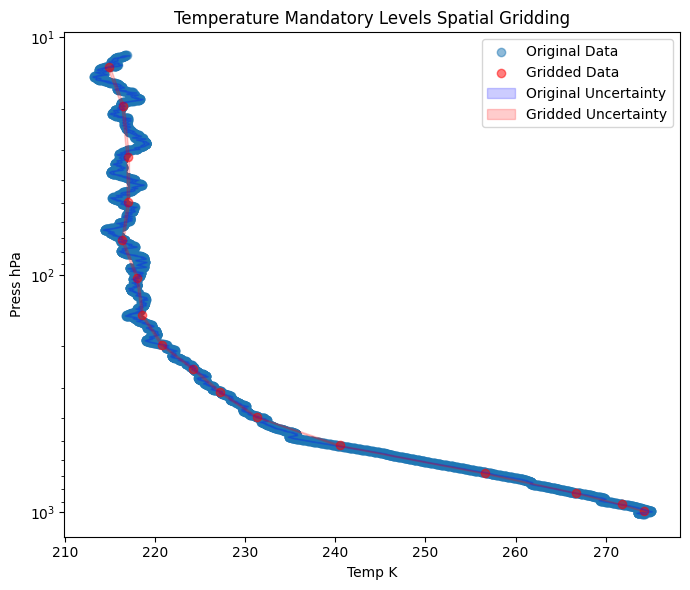

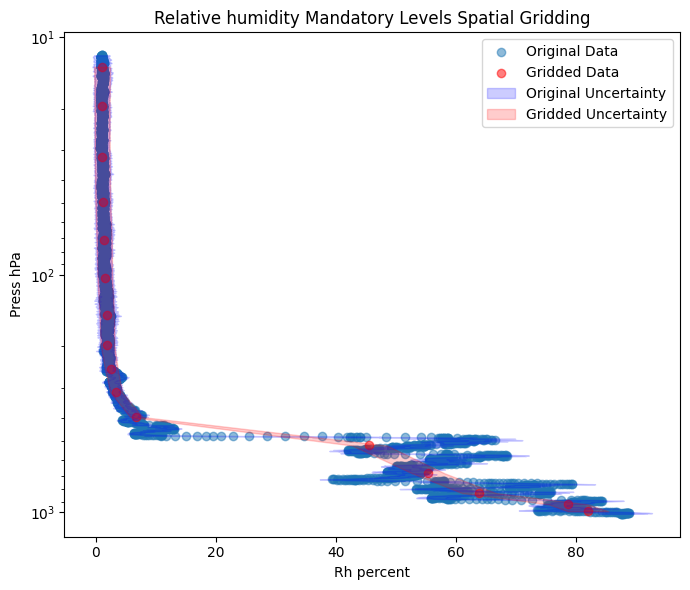

In [3]:
# GDP RS41 spatial gridding
file_path = r'gdp_demo_090625\LIN-RS-01_2_RS41-GDP_001_20141209T120000_1-009-002.nc'
gdp=gp.read(file_path)

bin_column = 'press' # Choose the binning column (alt or press)
target_columns = ['temp', 'rh']

ggd = gp.spatial_gridding(gdp, bin_column, target_columns)

# Plot original and gridded data
for column in target_columns:
    fig, ax1 = plt.subplots(figsize=(7, 6))
    if bin_column == 'press':
        ax1.set_yscale('log')
        ax1.invert_yaxis()
    ax1.scatter(gdp.data[column], gdp.data[bin_column], label='Original Data', alpha=0.5)
    ax1.scatter(ggd.data[column], ggd.data[bin_column], label='Gridded Data', color='red', alpha=0.5)
    ax1.fill_betweenx(gdp.data[bin_column], gdp.data[column] - gdp.data[column+'_uc'], gdp.data[column] + gdp.data[column+'_uc'], color='blue', alpha=0.2, label='Original Uncertainty')
    ax1.fill_betweenx(ggd.data[bin_column], ggd.data[column] - ggd.data[column+'_uc'], ggd.data[column] + ggd.data[column+'_uc'], color='red', alpha=0.2, label='Gridded Uncertainty')
    ax1.set_xlabel(f'{column.capitalize()} {gdp.variables_attrs[gdp.variables_attrs['variable'] == column]['units'].values[0]}')
    ax1.set_ylabel(f'{bin_column.capitalize()} {gdp.variables_attrs[gdp.variables_attrs['variable'] == bin_column]['units'].values[0]}')
    ax1.legend()
    long_name= gdp.variables_attrs[gdp.variables_attrs['variable'] == column]['long_name'].values[0]
    ax1.set_title(f'{long_name} Mandatory Levels Spatial Gridding')

    plt.tight_layout()
    # Enable interactive zoom for manual adjustment
    plt.show(block=True)

## PIPELINE

# DATA VISUALIZATION